# Python Project - MLP from scratch using NumPy - Application to MNIST dataset

*by Benjamin Aubignat, on February 5th 2022*

## Project objective

The objective of this project will be to create a Multi-Layer Perceptron using only the NumPy library.

Doing so will allow me to showcase both proficiency in basic Python programming and a good understanding of the artificial neural network.

I will then use the created object to train a model on the famous MNIST dataset in order to test its efficiency.

source : http://yann.lecun.com/exdb/mnist/

## Data preparation

Loading libraries and packages.

In [101]:
from torchvision import datasets
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Loading data.

In [102]:
train_set = datasets.MNIST('./data', train = True, download = True)
test_set = datasets.MNIST('./data', train = False, download = True)

Transforming both sets from torchvision.datasets objects to numpy arrays.

In [103]:
train_x = train_set.data.numpy()
test_x = test_set.data.numpy()
train_y = train_set.targets.numpy()
test_y = test_set.targets.numpy()

Every observation is in a matrix form, as to represent a written number in 2 dimensions.

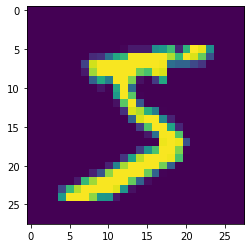

In [104]:
plt.imshow(train_x[0]);

We will flatten each matrix so each observation is represented by a vector. This allows for a vectorized implementation of the neural network.

A 28 * 28 matrix is therefore transformed into a 784 vector.

In [105]:
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1] ** 2);
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1] ** 2);

Each pixel is represented by a number in the range [0, 255] for its shade of grey.

We will divide every value by the maximum value 255 as to get only values in the [0, 1] range.

In [106]:
train_x = train_x / max(map(max, train_x))
test_x = test_x / max(map(max, test_x))

We will perform onehot encoding on the output value as to obtain for each observation a vector of length 10, filled with 0 and a 1.

In [107]:
def onehotencoding_y(y):
  temp = np.zeros((y.shape[0], y.max() + 1))
  temp[np.arange(y.shape[0]), y] = 1
  y = temp
  return y

In [108]:
train_y = onehotencoding_y(train_y)

## Multi-Layer Perceptron

We will use a neural network with one hidden layer containing 256 hidden units.

We will not introduce bias units as those won't improve the performance of the model in this case.

The activation function used will be the hyperbolic tangent.

We will randomly initialize weights for both layers with values following a univariate normal distribution (mean 0 and variance 1).

Those weights will then be scaled down as to facilitate the training sequences.

This class will allow the user to assign the required values to the number of hidden units, the learning rate and the nunber of epochs to go through during the fitting phase.

A "fit" function will adjust the weights of the neural network using forward and backward propagation, and the quadratic loss as cost function.

A "predict" function will output predictions based on the learned weights and a given test set.

In [109]:
class MLP:
  def __init__(self, hidden_units):
    self.hidden_units = hidden_units
    self.W1 = np.random.randn(train_x.shape[1], self.hidden_units) * 0.01
    self.W2 = np.random.randn(self.hidden_units, 10) * 0.01
    self.loss = list()
  def fit(self, train_x, train_y, alpha, epochs):
    for i in range(epochs):
      Z1 = np.dot(train_x, self.W1)
      A1 = np.tanh(Z1)
      Z2 = np.dot(A1, self.W2)
      A2 = (np.tanh(Z2) + 1) / 2
      self.loss.append(0.5 * np.square(A2 - train_y).sum())
      if i % 5 == 0:
        print("Cost at iteration n°", i, ": ", self.loss[i])
      dZ2 = A2 - train_y
      dW2 = (1 / self.hidden_units) * np.dot(A1.T, dZ2)
      db2 = (1 / self.hidden_units) * np.sum(dZ2, axis = 1, keepdims = True)
      dZ1 = np.multiply(np.dot(dZ2, self.W2.T), 1 - np.tanh(A1) ** 2)
      dW1 = (1 / train_x.shape[1]) * np.dot(train_x.T, dZ1)
      db1 = (1 / train_x.shape[1]) * np.sum(dZ1, axis = 1, keepdims = True)
      self.W1 = self.W1 - alpha * dW1
      self.W2 = self.W2 - alpha * dW2
  def predict(self, test_x):
    return np.argmax((np.tanh(np.dot(np.tanh(np.dot(test_x, self.W1)), self.W2)) + 1) / 2, axis = 1)

We create a new model with the required number of hidden units.

In [110]:
mlp = MLP(256)

We fit the model to the data with the required parameters while monitoring the cost.

In [111]:
mlp.fit(train_x, train_y, 1e-3, 500)

Cost at iteration n° 0 :  74955.16166496216
Cost at iteration n° 5 :  27545.21814755536
Cost at iteration n° 10 :  26892.125434377387
Cost at iteration n° 15 :  25943.663210786173
Cost at iteration n° 20 :  24521.983265385716
Cost at iteration n° 25 :  22640.79075342819
Cost at iteration n° 30 :  20620.04890970418
Cost at iteration n° 35 :  18773.338412676258
Cost at iteration n° 40 :  17223.781894141328
Cost at iteration n° 45 :  15955.777703776464
Cost at iteration n° 50 :  14905.619132687432
Cost at iteration n° 55 :  14016.641229394903
Cost at iteration n° 60 :  13251.346084465886
Cost at iteration n° 65 :  12586.275122108009
Cost at iteration n° 70 :  12005.487836054386
Cost at iteration n° 75 :  11496.48008028351
Cost at iteration n° 80 :  11048.372068759096
Cost at iteration n° 85 :  10651.452371940552
Cost at iteration n° 90 :  10297.250913176791
Cost at iteration n° 95 :  9978.65190921383
Cost at iteration n° 100 :  9689.879052876804
Cost at iteration n° 105 :  9426.3609647274

We can plot the curve of the loss and see that the model has appropriately learned.

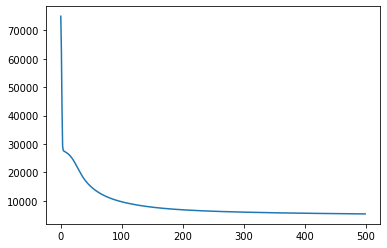

In [112]:
plt.plot(mlp.loss);

We can now make predictions using the learned weights on the test set...

In [113]:
pred = mlp.predict(test_x)

...and evaluate the performance of those predictions.

In [114]:
print("Accuracy :", (pred == test_y).sum() / 100, "%")

Accuracy : 91.14 %


## Conclusion

The trained model performs well on unseen data.

The model kept on learning even after 500 epochs. I decided to stop it as this was enough to showcase its efficiency.